## Телеком: прогнозирование оттока клиентов

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

### Описание услуг
**Оператор предоставляет два основных типа услуг: **
* Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
* Интернет. Подключение может быть двух типов: через телефонную линию (DSL, от англ. digital subscriber line, «цифровая абонентская линия») или оптоволоконный кабель (Fiber optic).

**Также доступны такие услуги:**
* Интернет-безопасность: антивирус (DeviceProtection) и блокировка небезопасных сайтов (OnlineSecurity);
* Выделенная линия технической поддержки (TechSupport);
* Облачное хранилище файлов для резервного копирования данных (OnlineBackup);
* Стриминговое телевидение (StreamingTV) и каталог фильмов (StreamingMovies).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.




С помощью этих данных необходимо построить модель, которая будет качественно прогнозировать отток клиентов.

### План работы

1. **Загрузка и изучение данных**
    - Импорт библиотек
    - Загрузка доступных данных
    - Описание загруженных данных
    - Сложный анализ и обработка данных (поиск аномалий, обработка дубликатов, обработка категориальных признаков, приведение данных к желаемому формату и т. д.)
2. **Объединение данных**
3. **Подготовка данных для обучения**
    - Определение целевого атрибута
    - Объединение данных в единый датафрейм
    - Подготовка признаков для обучения модели (удаление очевидно ненужных признаков, создание нового признака на основе существующих признаков, масштабирование признаков)
    - Разделение датафрейма на обучающие и тестовые выборки
    - Оценка наличия дисбаланса классов и, при необходимости, его устранение
4. **Обучение модели**
    - Выбор нескольких типов моделей (случайный лес, градиентный бустинг и т. д.)
    - На обучающей выборке обучить модель с использованием метода GridSearchCV, выбрать оптимальные гиперпараметры и оценить качество моделей с помощью метрики ROC-AUC
    - На основе полученных метрик мы можем сделать вывод о эффективности обученных моделей и выбрать оптимальную для дальнейшего тестирования
5. **Тестирование модели**
    - Построение кривых ROC-AUC
    - Для проведения теста на выбранной оптимальной модели полученная метрика AUC-ROC должна быть не менее 0.85
    - Сделать вывод об эффективности полученной модели
    - Оценка важности признаков и матрица ошибок
6. **Результаты**
    - Подвести итоги и представить полученные результаты
    - Сделать общий вывод об эффективности полученных результатов

### Загрузка и исследование данных


**Данные состоят из файлов, полученных из разных источников:**

* contract_new.csv — информация о договоре;
* personal_new.csv — персональные данные клиента;
* internet_new.csv — информация об интернет-услугах;
* phone_new.csv — информация об услугах телефонии.

**Во всех файлах столбец customerID содержит код клиента.**

Информация о договорах актуальна на 1 февраля 2020.

### Данные
* contract_new.csv
* personal_new.csv
* internet_new.csv
* phone_new.csv


Описание данных:
* BeginDate – дата начала пользования услугами,
* EndDate – дата окончания пользования услугами,
* Type – тип оплаты: ежемесячный, годовой и тд,
* PaperlessBilling – электронный платёжный документ,
* PaymentMethod – способ оплаты,
* MonthlyCharges – ежемесячные траты на услуги по договору,
* TotalCharges – всего потрачено денег на услуги,
* Dependents – наличие иждивенцев,
* Senior Citizen – наличие пенсионного статуса по возрасту,
* Partner – наличие супруга(и),
* MultipleLines – наличие возможности ведения параллельных линий во время звонка

### Импорт библиотек

In [ ]:
# Установка необходимых библиотек. CatBoost - это библиотека для работы с градиентным бустингом над деревьями
# !pip install catboost
# !pip install statsmodels
# !pip install sortedcontainers
#
# # Установка библиотеки phik
# !pip install phik

In [ ]:
# !pip install scikit-learn
# !pip install imbalanced-learn
# !pip install optuna

In [ ]:
# !pip install --upgrade scikit-learn
# !pip install --upgrade imbalanced-learn


In [ ]:
# Импортирование необходимых библиотек
import pandas as pd  # Библиотека для работы с табличными данными
import numpy as np  # Библиотека для работы с числовыми массивами
import glob
import os

%matplotlib inline
import matplotlib.pyplot as plt  # Библиотека для графического отображения данных

# Задание начального числа для генерации случайных чисел
import random
random_state=310723
random.seed(random_state)
np.random.seed(random_state)

# Подавление предупреждений
import warnings
warnings.filterwarnings('ignore')
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)
# Объединяем все датафреймы в один по 'customerID'
from functools import reduce
import re


# Импорт библиотек
import phik

import seaborn as sns  # Библиотека для создания статистических графиков
import statsmodels as sm  # Библиотека для оценки статистических моделей
from scipy import stats  # Библиотека для научных и инженерных вычислений
from sortedcontainers import SortedList

# Импортируем необходимые библиотеки

import collections
from itertools import product,chain
import copy

ModuleNotFoundError: No module named 'phik'

In [ ]:
# Библиотеки sklearn для создания и оценки моделей машинного обучения

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier
# Библиотека CatBoost для классификации, обучения и кросс-валидации
from catboost import CatBoostClassifier, Pool, cv as catboost_cv
# Дополнительные библиотеки sklearn
from sklearn.utils import shuffle
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# Импорт SMOTE из библиотеки imbalanced-learn
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,accuracy_score,roc_curve, auc,confusion_matrix, make_scorer, recall_score, precision_score, f1_score

from sklearn.model_selection import learning_curve
from sklearn.metrics import precision_recall_curve
#ДОПОЛНИТЕЛЬНО
# Импортируем необходимые библиотеки и инструменты
from sklearn.ensemble import BaggingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import optuna
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import OrdinalEncoder

# Задаем максимальное количество отображаемых строк и столбцов в pandas DataFrame
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
'Библиотеки загружены'

### Загрузка доступных данных

In [ ]:
# Загрузим данные в отдельные pandas DataFrame
# contract_new.csv
# personal_new.csv
# internet_new.csv
# phone_new.csv


try:
    contract = pd.read_csv('https://code.s3.yandex.net/datasets/contract_new.csv')
    internet = pd.read_csv('https://code.s3.yandex.net/datasets/internet_new.csv')
    personal = pd.read_csv('https://code.s3.yandex.net/datasets/personal_new.csv')
    phone = pd.read_csv('https://code.s3.yandex.net/datasets/phone_new.csv')
except:
    contract = pd.read_csv('/datasets/contract_new.csv')
    personal = pd.read_csv('/datasets/personal_new.csv')
    internet = pd.read_csv('/datasets/internet_new.csv')
    phone = pd.read_csv('/datasets/phone_new.csv')

### EDA, заполнение недостающих данных, анализ

In [ ]:
# Создадим словарь из этих DataFrame
dfs = {'contract': contract, 'internet': internet, 'phone': phone, 'personal': personal}

In [ ]:
#проверка
dfs["internet"].head()

In [ ]:
#размерность
for name, ds in dfs.items():
    print(f"Размер {name} {ds.shape}")

In [ ]:
# Итерация по каждому элементу в словаре dfs.
# 'name' - это ключ (название датасета), 'ds' - это значение (сам датасет в виде DataFrame)
for name, ds in dfs.items():
    # Выводим название датасета в верхнем регистре
    print(f"{name}".upper())
    # Выводим общую информацию о датасете, включая количество строк и столбцов, типы данных и пр.
    ds.info()
    # Выводим разделитель для удобства восприятия информации
    print("-"*50)


In [ ]:
# Итерация по каждому элементу в словаре dfs.
# 'name' - это ключ (название датасета), 'ds' - это значение (сам датасет в виде DataFrame)
for name, ds in dfs.items():
    # Выводим название датасета в верхнем регистре
    print(f"{name}".upper())
    # Отображаем две случайные строки из датасета для предварительного просмотра данных
    display(ds.sample(2))


получения информации о пропущенных значениях в DataFrame

**Функция describe_full(df)  для получения развернутого статистического описания DataFrame.**

In [ ]:
def describe_full(df):
    # Создаем DataFrame с базовым статистическим описанием каждого числового столбца
    data_describe = df.describe().T

    # Отбираем только числовые столбцы
    df_numeric = df._get_numeric_data()

    # Добавляем информацию о типах данных
    data_describe['типах данных'] = df_numeric.dtypes

    # Добавляем информацию о доле пропущенных значений
    data_describe['пропущенных значений %'] = df_numeric.isnull().sum()/len(df) * 100

    # Добавляем информацию о количестве уникальных значений
    data_describe['уникальных значений'] = df_numeric.apply(pd.Series.nunique)

    # Добавляем информацию об асимметрии
    data_describe['асимметрия'] = df_numeric.skew(axis = 0, skipna = True)

    # Возвращаем полученный DataFrame
    return data_describe

In [ ]:
# Проходим через все DataFrame в словаре dfs
for name, ds in dfs.items():
    # Печатаем разделитель и имя DataFrame
    print(50*"-"+name.upper()+50*"-")
    # Выводим развернутое статистическое описание числовых столбцов DataFrame
    display(describe_full(ds))
    # Печатаем два символа новой строки для удобства чтения
    print("\n\n")

### Обзор данных

Данные представлены в нескольких датафреймах:

1. **Contract:** Этот датафрейм содержит информацию о договорах. Всего в нем 7043 записи, пропущенных значений нет. Однако стоит отметить, что столбец TotalCharges имеет тип данных object, хотя предположительно должен быть числовым.

2. **Internet:** Этот датафрейм содержит информацию об интернет-услугах. Всего в нем 5517 записей, пропущенных значений нет. Все столбцы имеют тип данных object, что соответствует описанию.

3. **Personal:** Этот датафрейм содержит персональные данные клиентов. Всего в нем 7043 записи, пропущенных значений нет. Типы данных столбцов соответствуют описанию.

4. **Phone:** Этот датафрейм содержит информацию об услугах телефонии. Всего в нем 6361 записи, пропущенных значений нет. Все столбцы имеют тип данных object, что соответствует описанию.

Следующим шагом будет объединение этих датафреймов для дальнейшего анализа.

In [ ]:
# Создаём список всех датафреймов
dataframes = [contract, internet, personal, phone]

# Функция для слияния двух датафреймов
def merge_dataframes(df1, df2):
    return pd.merge(df1, df2, on='customerID', how='outer')

# Объединяем все датафреймы в один с помощью функции reduce
df = reduce(merge_dataframes, dataframes)

# Проверяем результат
df.head()

### Объединенные данные

После объединения датафреймов получили следующую общую информацию:

- **Записи:** 7043
- **Столбцы:** 20 (customerID, BeginDate, EndDate, Type, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, gender, SeniorCitizen, Partner, Dependents, MultipleLines)
- **Пропущенные значения:** есть в столбцах InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies и MultipleLines. Это может быть связано с тем, что не все клиенты пользуются всеми видами услуг.
- **Примечание:** столбец TotalCharges имеет тип данных object, хотя предполагалось, что он будет числовым. Необходимо будет преобразовать его в числовой тип.

Следующим шагом будет обработка пропущенных значений и преобразование типов данных, где это необходимо.


In [ ]:
# новый признак+
df['EndDate1']=df['EndDate']
df.loc[df['EndDate1'] == 'No',  'EndDate1'] = pd.to_datetime('2020-02-01 00:00:00')
df["days"] =  (pd.to_datetime(df['EndDate1']) - pd.to_datetime(df['BeginDate'])).dt.days
df= df.drop(['EndDate1'], axis=1)

In [ ]:
# Проверка на дубликаты
print(f"ДУбликаты : {df.duplicated().sum()}")

**Не содержит дубликатов. Это хороший знак, так как мы не должны заниматься удалением дублирующихся данных.**

### Категориальные признаки

Ниже приведен список категориальных признаков в наших данных:

1. **customerID** - идентификатор клиента
2. **BeginDate** - дата начала пользования услугами
3. **EndDate** - дата окончания пользования услугами
4. **Type** - тип оплаты (ежемесячный, годовой и т.д.)
5. **PaperlessBilling** - электронный платёжный документ
6. **PaymentMethod** - способ оплаты
7. **gender** - пол клиента
8. **SeniorCitizen** - пенсионный статус клиента (1 - пенсионер, 0 - не пенсионер)
9. **Partner** - наличие супруга(и)
10. **Dependents** - наличие иждивенцев
11. **InternetService** - тип интернет-соединения (DSL, Fiber optic, No)
12. **OnlineSecurity** - наличие услуги онлайн-безопасности
13. **OnlineBackup** - наличие услуги онлайн-резервного копирования
14. **DeviceProtection** - наличие услуги защиты устройства
15. **TechSupport** - наличие услуги технической поддержки
16. **StreamingTV** - наличие услуги потокового телевидения
17. **StreamingMovies** - наличие услуги потокового кино
18. **MultipleLines** - наличие возможности ведения параллельных линий во время звонка


In [ ]:
len(df)

In [ ]:
# Преобразуем 'TotalCharges' в числовой тип, пропущенные значения заменим на 0
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').fillna(0)
# Проверка пропущенных значений в 'totalcharges'
df[df['TotalCharges'].isnull()]

In [ ]:
# Нахождение признаков с пропущенными значениями
missing_values_features = df.columns[df.isnull().any()].tolist()

# Просмотр пропущенных значений
df[missing_values_features].isnull().sum()

### Обработка пропущенных значений

В данных есть несколько столбцов с пропущенными значениями:

1. **InternetService**, **OnlineSecurity**, **OnlineBackup**, **DeviceProtection**, **TechSupport**, **StreamingTV**, **StreamingMovies**: каждый из этих столбцов имеет 1526 пропущенных значений.
2. **MultipleLines**: этот столбец содержит 682 пропущенных значения.

Для всех этих признаков, мы предлагаем заменить пропущенные значения на "NotUsed". В нашем контексте это означает отсутствие определенной услуги.



In [ ]:
# Исправил по коментариям!!!
# Замена пропущенных значений в 'multiplelines', 'techsupport', 'streamingtv', 'streamingmovies' на 'NotUsed'
features_replace_no = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']
for feature in features_replace_no:
    df[feature].fillna('NotUsed', inplace=True)

In [ ]:
# Просмотр пропущенных значений
df[missing_values_features].isnull().sum()

Дополнительно! добавим новый признак. Данные которые имеют большое количество пропусков будут дополнительными

In [ ]:
df

In [ ]:

# Столбцы с большим количеством пропусков будут считаться дополнительными услугами
features_dop = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']
# Пересчитаем признак "TotalServices" с учётом только бинарных столбцов
df['TotalServices'] = df[features_dop].apply(lambda row: sum(row == 'Yes'), axis=1)
df['TotalServices'].unique()

In [ ]:
#проверка не потеряли чего=)
len(df)

### Обработка данных завершена

Мы успешно обработали пропущенные значения и преобразовали столбец 'TotalCharges' в числовой тип. Теперь все признаки в нашем датафрейме имеют ожидаемые типы данных и нет пропущенных значений.

Вот обновленная информация о датафрейме:

- Записи: 7043
- Столбцы: 20 (customerID, BeginDate, EndDate, Type, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, gender, SeniorCitizen, Partner, Dependents, MultipleLines)
- Пропущенные значения: нет

Следующим шагом будет исследование данных и их визуализация для более глубокого понимания.




In [ ]:
# Визуализация распределения числовых признаков
numeric_features = ['MonthlyCharges', 'TotalCharges']

for feature in numeric_features:
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], bins=30, kde=False)
    plt.title('Распределение ' + feature)

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[feature])
    plt.title('Ящик с усами ' + feature)

    plt.tight_layout()
    plt.show()

# Визуализация бинарных и категориальных признаков
binary_features = ['Type', 'PaperlessBilling', 'PaymentMethod', 'InternetService', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                   'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines','TotalServices']

for feature in binary_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[feature])
    plt.title('Распределение ' + feature)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


### Анализ признаков

#### Числовые признаки:

**'MonthlyCharges'**:
Большинство ежемесячных платежей находятся в диапазоне от 20 до 30 и от 70 до 100. Есть меньшее количество клиентов с ежемесячными платежами в диапазоне от 30 до 70.

**'TotalCharges'**:
Большинство общих платежей находятся в диапазоне от 0 до 5000. Есть некоторое количество клиентов с общими платежами более 5000.

#### Бинарные и категориальные признаки:

**'Type'**:
Большинство клиентов предпочитают платить по месячной системе.

**'PaperlessBilling'**:
Большинство клиентов предпочитают безбумажную систему оплаты.

**'PaymentMethod'**:
Большинство клиентов предпочитают автоматический способ оплаты через банк или электронную систему оплаты. Меньшинство клиентов предпочитают оплату чеком.

**'InternetService'**:
Большинство клиентов используют оптоволоконный интернет, в то время как некоторые клиенты используют DSL. Есть также некоторое количество клиентов, которые не используют интернет-услуги.

**'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport'**:
Большинство клиентов не используют эти услуги.

**'StreamingTV', 'StreamingMovies'**:
Распределение клиентов примерно одинаково между теми, кто использует эти услуги, и теми, кто их не использует.

**'gender'**:
Количество мужчин и женщин примерно одинаково.

**'SeniorCitizen'**:
Большинство клиентов не являются пенсионерами.

**'Partner', 'Dependents'**:
Распределение клиентов примерно одинаково между теми, у кого есть партнеры или иждивенцы, и теми, у кого их нет.

**'MultipleLines'**:
Большинство клиентов не имеют возможности использования нескольких линий.

В следующем шаге мы обработаем категориальные признаки и подготовим данные к моделированию.


In [ ]:
df.head()

In [ ]:
# Кодируем 'EndDate' в бинарный формат
df['EndDate'] = df['EndDate'].apply(lambda x: 0 if x == "No" else 1)

### временное распределение клиентов ( тренд по уходу)

In [ ]:
# # Преобразуем 'BeginDate' в формат datetime
df['BeginDate'] = pd.to_datetime(df['BeginDate'])

In [ ]:
# Создаем новые датафреймы, группируя данные по месяцам начала пользования услугами и считая средний ежемесячный платеж для ушедших и не ушедших клиентов
churn_monthly_charges = df[df['EndDate'] == 1].groupby(df['BeginDate'].dt.to_period('M'))['MonthlyCharges'].mean()
not_churn_monthly_charges = df[df['EndDate'] == 0].groupby(df['BeginDate'].dt.to_period('M'))['MonthlyCharges'].mean()

# Выводим тренд среднего ежемесячного платежа ушедших и не ушедших клиентов
plt.figure(figsize=(12, 6))
churn_monthly_charges.plot(kind='line', label='Ушедшие клиенты')
not_churn_monthly_charges.plot(kind='line', label='Не ушедшие клиенты')
plt.title('Тренд среднего ежемесячного платежа ушедших и не ушедших клиентов')
plt.xlabel('Дата начала пользования услугами')
plt.ylabel('Средний ежемесячный платеж')
plt.legend()
plt.show()



* На графике представлен тренд ухода клиентов в зависимости от даты начала использования услуг. Мы видим, что количество ушедших клиентов варьируется в зависимости от месяца начала использования услуг, но нет явного общего тренда роста или снижения.

* Важно отметить, что эти данные не предоставляют полной информации о причинах ухода клиентов и могут включать факторы, которые мы не учли в нашем анализе, такие как изменения в условиях услуг, конкуренция на рынке и так далее.

* В целом, поиск способов снижения оттока клиентов будет полезным для бизнеса, и модель прогнозирования, которую мы разработали, может помочь в этом.

In [ ]:
# Создаем новые датафреймы, группируя данные по месяцам начала пользования услугами и считая стандартное отклонение ежемесячного платежа для ушедших и не ушедших клиентов
churn_monthly_charges_std = df[df['EndDate'] == 1].groupby(df['BeginDate'].dt.to_period('M'))['MonthlyCharges'].std()
not_churn_monthly_charges_std = df[df['EndDate'] == 0].groupby(df['BeginDate'].dt.to_period('M'))['MonthlyCharges'].std()

# Выводим тренд изменения стандартного отклонения ежемесячного платежа ушедших и не ушедших клиентов
plt.figure(figsize=(12, 6))
churn_monthly_charges_std.plot(kind='line', label='Ушедшие клиенты')
not_churn_monthly_charges_std.plot(kind='line', label='Не ушедшие клиенты')
plt.title('Тренд изменения стандартного отклонения ежемесячного платежа ушедших и не ушедших клиентов')
plt.xlabel('Дата начала пользования услугами')
plt.ylabel('Стандартное отклонение ежемесячного платежа')
plt.legend()
plt.show()

* На графике представлен тренд среднего ежемесячного платежа для ушедших (синий) и не ушедших (оранжевый) клиентов.

* Мы видим, что средний ежемесячный платеж ушедших клиентов, в целом, выше, чем у клиентов, которые остались. Это может указывать на то, что цена является одним из факторов, которые влияют на решение клиента уйти.

* В то же время, мы видим, что с течением времени средний ежемесячный платеж как у ушедших, так и у не ушедших клиентов имеет тенденцию к росту. Это может быть связано с повышением цен на услуги или с тем, что клиенты со временем начинают пользоваться большим количеством услуг, что увеличивает их ежемесячный платеж.

* Также стоит отметить, что в начале периода (с 2014 по 2015 год) у нас мало данных, поэтому в этот период могут наблюдаться значительные колебания в среднем ежемесячном платеже.

* Эти выводы могут быть полезными для бизнеса при разработке стратегий удержания клиентов.



In [ ]:
# Явно задаем интервальные столбцы(исправлено)
interval_columns = ['MonthlyCharges', 'days', 'TotalCharges']

In [ ]:
dfc = df.drop(['customerID'], axis=1)
# Вычисление матрицы корреляции phik с учетом интервальных столбцов
correlation_matrix = dfc.phik_matrix(interval_cols=interval_columns)
# Визуализация матрицы корреляции с помощью heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Phik матрица корреляции')
plt.show()

Обнаружили высокую мультиколлинеарность, вот несколько способов её устранения:
выше  0,9 у 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies',days.

* Удалите одну из высококоррелированных переменных.
* Сделайте комбинированную переменную из двух или более переменных.
* Используйте методы регуляризации, такие как Ridge или Lasso регрессия.**(используем это)**
для скорости можно оставить 'InternetService', остальное удалить

In [ ]:
df['EndDate'].unique()

In [ ]:
df = df.drop(['InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies'], axis=1)

### Разделяем датафрейм на признаки и целевую переменную
кодируем

In [ ]:
# Разделяем датафрейм на признаки и целевую переменную(исправил)
X = df.drop(['customerID', 'EndDate','BeginDate'], axis=1)
y = df['EndDate']

In [ ]:
# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_state, stratify=y)

In [ ]:
# Создаем списки числовых и категориальных признаков
numeric_features = ['MonthlyCharges', 'TotalCharges','days']
categorical_features = list(set(X.columns) - set(numeric_features))

In [ ]:
#Преобразуем имена столбцов в индексы:
numeric_feature_indices = [X.columns.get_loc(col) for col in numeric_features]
categorical_feature_indices = [X.columns.get_loc(col) for col in categorical_features]


In [ ]:

# Создаем трансформеры для числовых и категориальных признаков
numeric_transformer = StandardScaler()



# Трансформер для линейных моделей
linear_preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_feature_indices),
        ('cat', OneHotEncoder(handle_unknown='ignore',drop='first'), categorical_feature_indices)
    ])

# Для OrdinalEncoder добавим обработку неизвестных категорий(доработка)
# Установим handle_unknown='use_encoded_value' и unknown_value=-1 (или любое другое значение, которое вы посчитаете подходящим)
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Трансформер для древовидных моделей
tree_preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_feature_indices),
        ('cat', ordinal_encoder, categorical_feature_indices)
    ])


# # Трансформер для древовидных моделей
# tree_preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numeric_feature_indices),
#         ('cat', OrdinalEncoder(), categorical_feature_indices)
#     ])


In [ ]:
 # Преобразуем данные (перенес  в pipline ниже)
# X_train = preprocessor.fit_transform(X_train)
# X_test = preprocessor.transform(X_test)

In [ ]:
X_train.shape, X_test.shape


In [ ]:
# Проверка баланса классов
class_balance = y_train.value_counts(normalize=True)
print("Class balance:")
print(class_balance)

### Разделение данных и баланс классов

**Разделение данных**: Данные были успешно разделены на обучающую и тестовую выборки.

**Баланс классов**: Проверка баланса классов показывает, что у нас имеется дисбаланс классов:

- Класс "0" (клиенты, которые остаются) составляет примерно 84% от обучающей выборки.
- Класс "1" (клиенты, которые ушли) составляет только около 16%.

**Проблема дисбаланса классов**: Это может привести к тому, что модель будет предсказывать большинственный класс лучше, чем миноритарный, что может быть проблемой, поскольку нас интересует именно прогнозирование оттока клиентов.

**Возможные решения**: Есть несколько способов устранения дисбаланса классов, включая:

- **Undersampling** - случайное удаление примеров из большинственного класса.
- **Oversampling** - случайное дублирование примеров из миноритарного класса.
- **SMOTE** (Synthetic Minority Over-sampling Technique) - создание синтетических примеров миноритарного класса.

Важно отметить, что эти техники должны применяться только к обучающей выборке, чтобы избежать утечки информации из тестовой выборки.
НО что целевая метрика проекта - `AUC-ROC`,нечувствительна к дисбалансу.

In [ ]:
# # Инициализация SMOTE( ненужно)
# smote = SMOTE(random_state=random_state)

# # Применение SMOTE к обучающей выборке
# X_train, y_train = smote.fit_resample(X_train, y_train)

# # Проверка баланса классов после применения SMOTE
# class_balance = y_train.value_counts(normalize=True)
# print("Class balance after SMOTE:")
# print(class_balance)


In [ ]:

# Задаем параметры для инициализации моделей
logistic_params = {'random_state': random_state, 'penalty': 'elasticnet', 'solver': 'saga', 'l1_ratio': 0.5}
lgbm_params = {'random_state': random_state, 'n_jobs': -1}
xgb_params = {'random_state': random_state, 'use_label_encoder': False, 'eval_metric': 'logloss', 'n_jobs': -1}

In [ ]:

# Задаем гиперпараметры для каждой модели
logistic_grid = {
    'model__C': [0.001, 0.01, 0.1, 1, 10],
    'model__l1_ratio': [0.1, 0.5, 0.9]
}

lgbm_grid = {
    'model__n_estimators': [200, 250,400,500,800],
    'model__learning_rate': [0.001, 0.01, 0.1],
    'model__max_depth': [3, 5, 7, 10, 14, 20],
    'model__num_leaves': [31, 50, 100, 150]
}

xgb_grid = {
    'model__n_estimators': [200, 250,400,500,800],
    'model__learning_rate': [0.001, 0.01, 0.1],
    'model__max_depth': [3, 5, 7, 10, 14, 20]

}

In [ ]:

# Создание пайплайнов преобразования и обучения для разных типов моделей
logistic_pipeline = Pipeline(steps=[
    ('preprocessor', linear_preprocessor),
    ('model', LogisticRegression(**logistic_params))
])

lgbm_pipeline = Pipeline(steps=[
    ('preprocessor', tree_preprocessor),
    ('model', LGBMClassifier(**lgbm_params))
])

xgb_pipeline = Pipeline(steps=[
    ('preprocessor', tree_preprocessor),
    ('model', XGBClassifier(**xgb_params))
])

# Создаем список с моделями и их гиперпараметрами
models = [
    ('LogisticRegression', logistic_pipeline, logistic_grid),
    ('LightGBM', lgbm_pipeline, lgbm_grid),
    ('XGBoost', xgb_pipeline, xgb_grid)
]

# Задаем параметры для кросс-валидации
cv = 5  # количество блоков для кросс-валидации
# Словарь для хранения лучших моделей
best_models = {}

# Обучаем модели, выполняем кросс-валидацию и выводим результаты
for name, pipeline, grid in models:
    # Инициализируем GridSearchCV с пайплайном
    grid_search = GridSearchCV(pipeline, grid, cv=cv, scoring='roc_auc', n_jobs=-1)

    # Обучаем модель и ищем лучшие параметры
    grid_search.fit(X_train, y_train)

    # Получаем и сохраняем лучшие параметры и модель
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Сохраняем лучшую модель в словаре
    best_models[name] = best_model

    # Извлекаем ROC-AUC на кросс-валидации
    cv_roc_auc = grid_search.best_score_

    # Выводим метрики и лучшие параметры
    print(f"Модель: {name}")
    print(f"Лучшие параметры: {best_params}")
    print(f"ROC-AUC на кросс-валидации: {cv_roc_auc:.3f}")
    print('-------------------------------------------')


### ДОПОЛНИТЕЛЬНО


#### OPTUNA

In [ ]:
def objective(trial):
    # Определите параметры, которые вы хотите оптимизировать
    params = {
        'model__n_estimators': trial.suggest_int('n_estimators', 50, 800),
        'model__learning_rate': trial.suggest_float('learning_rate', 0.01, 1, log=True),
        'model__max_depth': trial.suggest_int('max_depth', 3,20),
        'model__use_label_encoder': False,
        'model__eval_metric': 'logloss',
        'model__n_jobs': -1,
        'model__random_state': random_state
    }

    # Создайте пайплайн с текущими параметрами
    xgb_pipeline = Pipeline(steps=[
        ('preprocessor', tree_preprocessor),
        ('model', XGBClassifier())
    ])

    # Обновите пайплайн с помощью заданных параметров
    xgb_pipeline.set_params(**params)

    # Выполняйте кросс-валидацию и получайте средний ROC-AUC
    roc_auc_scores = cross_val_score(xgb_pipeline, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1)
    mean_roc_auc = roc_auc_scores.mean()

    return mean_roc_auc


In [ ]:
# Инициализируем процесс оптимизации: хотим максимизировать метрику
study = optuna.create_study(direction='maximize')
# Запускаем оптимизацию для 50 итераций (можно изменить)
study.optimize(objective, n_trials=50)

# Выводим лучшие найденные параметры и соответствующее им значение ROC-AUC
print(f"Лучшие параметры: {study.best_params}")
print(f"Лучший ROC-AUC: {study.best_value}")

#### При использовании GridSearchCV в scoring, помимо AUC-ROC, передай также метрики accuracy, recall, precision и f1 с переобучением по AUC-ROC. Результаты кросс-валидации оформи в виде таблицы, где по каждой модели будут значения соответствующих метрик. Результаты извлеки из cv_results_ с помощью best_index_.

In [ ]:
# Определяем словарь с метриками, которые мы хотим использовать
scorers = {
    'roc_auc': 'roc_auc',  # ROC-AUC
    'accuracy': make_scorer(accuracy_score),  # Точность
    'recall': make_scorer(recall_score),  # Полнота
    'precision': make_scorer(precision_score),  # Точность (прецизионность)
    'f1': make_scorer(f1_score)}  # F1-мера


#  список моделей, чтобы он включал пайплайны, а не отдельные модели:


# Создаем список с моделями и их гиперпараметрами
models = [
    ('LogisticRegression', logistic_pipeline, logistic_grid),
    ('LightGBM', lgbm_pipeline, lgbm_grid),
    ('XGBoost', xgb_pipeline, xgb_grid)
]

# Соберем результаты в список для дальнейшего преобразования в DataFrame
results_df = []

# Проходим по списку моделей и их гиперпараметрам для оптимизации
for name, model, grid in models:
    # Инициализируем GridSearchCV с множественными метриками
    grid_search = GridSearchCV(model, grid, cv=cv, scoring=scorers, refit='roc_auc', n_jobs=-1)
    grid_search.fit(X_train, y_train)  # Обучаем модели

    # Извлекаем результаты для лучших параметров
    best_idx = grid_search.best_index_
    results = {
        'Model': name,
        'Best Params': grid_search.best_params_,
        'ROC-AUC': grid_search.cv_results_['mean_test_roc_auc'][best_idx],
        'Accuracy': grid_search.cv_results_['mean_test_accuracy'][best_idx],
        'Recall': grid_search.cv_results_['mean_test_recall'][best_idx],
        'Precision': grid_search.cv_results_['mean_test_precision'][best_idx],
        'F1 Score': grid_search.cv_results_['mean_test_f1'][best_idx]
    }

    results_df.append(results)  # Добавляем результаты в список

# Преобразуем список результатов в DataFrame для удобства представления

results_df = pd.DataFrame(results_df)

# Выводим результаты
results_df



#### Сделай бэгинг и стэкниг из моделей KNN, SVM и CatBoost в качестве дополнительной модели.
* CatBoost используй в качестве мета-модели при стэкнге
* Гиперпараметры для них подбирать не нужно - оценку можно выполнить просто на кросс-валидации или с помощью GridSearchCV и пустого словаря гиперпараметров.

* Бэггинг :
Основан на принципе усреднения ответов нескольких моделей машинного обучения для уменьшения дисперсии.

* Стэкинг :
Комбинирует прогнозы из нескольких моделей машинного обучения для генерации нового набора данных, который затем используется для обучения так называемой мета-модели.

In [ ]:
# Бэггинг для KNN
knn_pipeline = Pipeline(steps=[
        ('preprocessor', linear_preprocessor),
        ('model', KNeighborsClassifier())
    ])

# Бэггинг для SVM
svm_pipeline = Pipeline(steps=[
        ('preprocessor', linear_preprocessor),
        ('model', SVC(probability=True,random_state=random_state))# Включаем опцию probability и задаем random_state
    ])

In [ ]:
bagged_knn = BaggingClassifier(base_estimator=knn_pipeline, n_estimators=100, random_state=random_state)

# Определим параметры для GridSearchCV (пустой, потому что вы не хотели подбирать гиперпараметры)
params = {}

# Определим GridSearchCV
grid_search = GridSearchCV(bagged_knn, param_grid=params, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Получим ROC-AUC из лучшего оценщика
predicted_probs_knn = grid_search.best_estimator_.predict_proba(X_train)[:, 1]
roc_auc_knn = roc_auc_score(y_train, predicted_probs_knn)
print(f"ROC-AUC for bagged KNN: {roc_auc_knn:.3f}")



In [ ]:

# Бэггинг для модели SVM
bagged_svm = BaggingClassifier(base_estimator=svm_pipeline, n_estimators=50, random_state=random_state)

# Определим параметры для GridSearchCV (пустой, потому что вы не хотели подбирать гиперпараметры)
params = {}

# Определим GridSearchCV
grid_search_svm = GridSearchCV(bagged_svm, param_grid=params, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_svm.fit(X_train, y_train)


In [ ]:
# Получим ROC-AUC из лучшего оценщика
predicted_probs_svm = grid_search_svm.best_estimator_.predict_proba(X_train)[:, 1]
roc_auc_svm = roc_auc_score(y_train, predicted_probs_svm)
print(f"ROC-AUC for bagged SVM: {roc_auc_svm:.3f}")


In [ ]:

# Определяем базовые модели для стекинга
base_learners = [
    ('knn', knn_pipeline),
    ('svm', svm_pipeline)
]

# Создаем стэкинг на основе базовых моделей с CatBoost как финальным оценщиком и заданным random_state
stack = StackingClassifier(estimators=base_learners, final_estimator=CatBoostClassifier(verbose=0, random_seed=random_state), cv=5)


In [ ]:
# Определяем GridSearchCV для стэкинга
grid_search_stack = GridSearchCV(stack, param_grid=params, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_stack.fit(X_train, y_train)


# Получаем ROC-AUC из лучшего оценщика на кросс-валидации(исправление)
roc_auc_stacked_cv = grid_search_stack.best_score_
print(f"ROC-AUC for stacked models on cross-validation: {roc_auc_stacked_cv:.3f}")


In [ ]:
# # Примените лучшие модели на тестовых данных
# for name, model in best_models.items():
#     test_preds = model.predict_proba(X_test)[:, 1]
#     test_roc_auc = roc_auc_score(y_test, test_preds)
#     test_accuracy = accuracy_score(y_test, test_preds.round())
#
#     print(f"Модель: {name}")
#     print(f"ROC-AUC на тестовой выборке: {test_roc_auc:.4f}")
#     print(f"Accuracy на тестовой выборке: {test_accuracy:.4f}")
#     print('-------------------------------------------')
last_model_name = list(best_models.keys())[-1]
last_model = best_models[last_model_name]

test_preds = last_model.predict_proba(X_test)[:, 1]
test_roc_auc = roc_auc_score(y_test, test_preds)
test_accuracy = accuracy_score(y_test, test_preds.round())

print(f"Модель: {last_model_name}")
print(f"ROC-AUC на тестовой выборке: {test_roc_auc:.4f}")
print(f"Accuracy на тестовой выборке: {test_accuracy:.4f}")
print('-------------------------------------------')

#### Precision-Recall кривая: Этот график очень полезен, когда классы в ваших данных несбалансированы. Он показывает trade-off между precision (точность) и recall (полнота).

In [ ]:
# Вычисляем значения для Precision-Recall кривой (точность-полнота)
precision, recall, thresholds = precision_recall_curve(y_test, test_preds)

# Строим Precision-Recall кривую
plt.figure(figsize=(10,6))
plt.plot(recall, precision, label='Кривая точность-полнота')
plt.xlabel('Полнота')
plt.ylabel('Точность')
plt.title('Кривая точность-полнота')
plt.legend(loc='best')
plt.show()

*Интерпретация:** (исправленная)

#### Кривая для задачи ухода клиентов

В контексте задачи ухода клиентов **Precision-Recall кривая** особенно полезна, так как позволяет понять эффективность модели в предсказании действительно уходящих клиентов.

### Определения:

1. **Точность (Precision)**: Отражает, какой процент клиентов, которых модель определила как "уходящие", действительно ушли.

2. **Полнота (Recall)**: Показывает, какой процент всех ушедших клиентов был корректно идентифицирован моделью.


### Как интерпретировать в контексте ухода клиентов?

Идеальная модель будет иметь точку в правом верхнем углу графика (точность и полнота равны 1). Однако на практике это редко достижимо, и важно выбрать оптимальный баланс между точностью и полнотой в зависимости от бизнес-требований.

- **Высокая Точность**: Это означает, что модель правильно определяет большую часть клиентов, которые действительно уходят, но при этом может пропускать некоторых других уходящих клиентов. Такой подход может быть оптимален, если ресурсы компании ограничены, и она может предпринять действия только по небольшому числу клиентов.

- **Высокая Полнота**: Это означает, что модель определяет большую часть уходящих клиентов, но при этом также может "подозревать" в уходе тех, кто на самом деле не собирается уходить. Этот вариант может быть предпочтителен, если стоимость привлечения клиента обратно или предотвращение его ухода низкая по сравнению с потерянной прибылью от ухода.

Выбор оптимальной точки на кривой зависит от бизнес-стратегии компании: если компания готова потратить больше ресурсов, чтобы удержать как можно больше клиентов, она может выбрать модель с высокой полнотой. Если же ресурсы ограничены, и важнее минимизировать "ложные тревоги", стоит ориентироваться на модели с высокой точностью.


In [ ]:
# Вычисляем кривые обучения
train_sizes, train_scores, validation_scores = learning_curve(
    # Модель, которую мы хотим исследовать
    estimator = best_model,
    # Обучающие данные и метки
    X = X_train,
    y = y_train,
    # Размеры обучающих выборок, которые мы хотим исследовать
    train_sizes = np.linspace(0.1,1,20),
    # Количество фолдов в кросс-валидации
    cv = 5
)

# Вычисляем средние значения для оценок обучения и валидации
train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

# Строим график
plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_scores_mean, label = 'Ошибка обучения')
plt.plot(train_sizes, validation_scores_mean, label = 'Ошибка валидации')
plt.ylabel('Производительность')
plt.xlabel('Размер обучающей выборки')
plt.title('Кривые обучения')
plt.legend()
plt.show()

**Интерпретация:**
* Ошибка обучения: Ошибка обучения начинается с низкого значения, что указывает на то, что модель хорошо обучается на небольших объемах данных. Но по мере увеличения размера обучающей выборки, модель теряет способность идеально соответствовать данным, что приводит к увеличению ошибки обучения.

* Ошибка валидации: Когда размер обучающей выборки небольшой, модель плохо обобщает новые данные, и ошибка валидации высока. Но по мере увеличения размера обучающей выборки модель лучше обучается, и ошибка валидации снижается.

* Если ошибка обучения и валидации начинают сходиться и ошибка валидации начинает уменьшаться, это хороший знак. Это говорит о том, что модель обучается и с каждым новым наблюдением ошибка на валидации уменьшается.

* Если ошибка обучения и валидации начинают сходиться, но ошибка валидации остается высокой, это может указывать на недообучение.

* Если ошибка обучения низкая, а ошибка валидации высокая и они не сходятся при увеличении размера обучающего набора, это может указывать на переобучение.

Модель XGBoost показала на тесте результат по метрике ROC-AUC , достигнув значения 0.9 , что выше порогового значения 0.85.

Accuracy на тестовой выборке:0.916


In [ ]:
# Вычисляем кривую ROC
fpr, tpr, thresholds = roc_curve(y_test, test_preds)
roc_auc = auc(fpr, tpr)
# Построение графика
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC-AUC curve for {name}')
plt.legend(loc="lower right")
plt.show()

In [ ]:
df = feature_importances.sort_values('importance', ascending=False).head(10)
df

In [ ]:
# предполагаем, что df - ваш датафрейм
df = feature_importances.sort_values('importance', ascending=False).head(10)

plt.figure(figsize=(10, 8))
plt.barh(df['feature'], df['importance'])
plt.xlabel('Важность')
plt.ylabel('Признаки')
plt.title('Важность признаков')
plt.gca().invert_yaxis()  # чтобы наиболее важные признаки были сверху
plt.show()


### Важность признаков (дописал)

Важность признаков в модели позволяет нам оценить, какой вклад вносит каждый признак в прогнозируемый результат. Понимание этого вклада помогает выявить ключевые факторы, которые влияют на результаты прогнозирования, и может дать подсказки о том, на какие аспекты данных стоит обратить особое внимание при интерпретации результатов.

Ниже представлены 10 наиболее важных признаков:
**Важность признаков модели:**

1. **cat__MultipleLines_Yes (0.097696)**:
   - **Описание**: У клиента активирована услуга многоканальной связи.
   - **Интерпретация**: Наличие многоканальной связи может быть важным индикатором для прогнозирования ухода клиента.

2. **cat__PaymentMethod_Bank transfer (automatic) (0.063979)**:
   - **Описание**: Клиент использует автоматический банковский перевод для оплаты.
   - **Интерпретация**: Метод оплаты может быть связан с уровнем доверия или удобством использования услуги.

3. **cat__Type_One year (0.046754)**:
   - **Описание**: Длительность контракта с клиентом составляет один год.
   - **Интерпретация**: Клиенты с годовым контрактом, возможно, менее склонны уходить.

4. **cat__Type_Month-to-month (0.039739)**:
   - **Описание**: Длительность контракта с клиентом составляет один месяц.
   - **Интерпретация**: Месячные контракты могут указывать на неустойчивость отношений с клиентом.

5. **cat__DeviceProtection_Yes (0.038321)**:
   - **Описание**: У клиента есть защита устройства.
   - **Интерпретация**: Защита устройства может коррелировать с уровнем удовлетворенности или инвестициями клиента в услугу.

6. **cat__Partner_No (0.032018)**:
   - **Описание**: У клиента нет партнера.
   - **Интерпретация**: Наличие или отсутствие партнера может влиять на решения, связанные с продолжением или прекращением услуги.

7. **cat__gender_Female (0.030832)**:
   - **Описание**: Пол клиента — женский.
   - **Интерпретация**: Пол может иметь влияние на принятие решений, хотя это зависит от контекста и демографии клиентов.

8. **cat__Dependents_No (0.025032)**:
   - **Описание**: У клиента нет иждивенцев.
   - **Интерпретация**: Наличие иждивенцев может влиять на финансовые решения или потребности в услугах.

9. **cat__PaymentMethod_Mailed check (0.024882)**:
   - **Описание**: Клиент использует почтовый чек для оплаты.
   - **Интерпретация**: Этот способ оплаты может указывать на предпочтения клиента в плане удобства и традиций.

10. **cat__OnlineSecurity_No (0.019318)**:
   - **Описание**: У клиента нет онлайн-безопасности.
   - **Интерпретация**: Отсутствие онлайн-безопасности может указывать на менее защищенный или менее инвестированный профиль клиента.





Эти признаки, судя по их важности, играют ключевую роль в прогнозировании оттока клиентов. На их основе можно строить бизнес-стратегии для удержания клиентов и улучшения качества обслуживания.




In [ ]:
# Обучаем модели и ищем лучшие гиперпараметры
for name, model, grid in models[-1:]:

    # Получаем предсказания
    test_preds = best_model.predict(X_test)

    # Вычисляем матрицу ошибок
    cm = confusion_matrix(y_test, test_preds)

    # Выводим матрицу ошибок
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Матрица ошибок для {name}")
    plt.xlabel('Предсказанное значение')
    plt.ylabel('Истинное значение')
    plt.show()


Матрица ошибок (confusion matrix) - это таблица, которая позволяет визуализировать производительность алгоритма классификации.
На основании матрицы ошибок можно сделать следующие выводы:

- 1461 - количество истинно отрицательных предсказаний (True Negatives, TN): Модель правильно предсказала, что эти примеры были отрицательными.
- 25 - количество ложно положительных предсказаний (False Positives, FP): Модель неправильно предсказала, что эти примеры были положительными.
- 141 - количество ложно отрицательных предсказаний (False Negatives, FN): Модель неправильно предсказала, что эти примеры были отрицательными.
- 134 - количество истинно положительных предсказаний (True Positives, TP): Модель правильно предсказала, что эти примеры были положительными.

## Анализ матрицы ошибок в контексте бизнеса

### 1. Истинно отрицательные (TN: 1461)
- **Бизнес-интерпретация**: Это клиенты, которых модель правильно идентифицировала как не склонных к конкретному действию (например, уходу). С точки зрения бизнеса, ресурсы на их удержание можно было бы сохранить или перераспределить.

### 2. Ложноположительные (FP: 25)
- **Бизнес-интерпретация**: Это клиенты, которых модель неправильно классифицировала как склонных к определенному действию, хотя на самом деле они не были. Это может означать потраченные впустую ресурсы, если бизнес пытался применять стратегии удержания к этим клиентам.

### 3. Ложноотрицательные (FN: 141)
- **Бизнес-интерпретация**: Это клиенты, которые, по мнению модели, не склонны к определенному действию, но на самом деле они склонны. Это может быть наиболее критичной ошибкой, так как бизнес может потерять этих клиентов, не предприняв попыток их удержать.

### 4. Истинноположительные (TP: 134)
- **Бизнес-интерпретация**: Это клиенты, которых модель правильно идентифицировала как склонных к определенному действию. Стратегии удержания, применяемые к этим клиентам, должны быть наиболее эффективными.

**На практике**: С точки зрения бизнеса, особое внимание стоит уделять FN (ложноотрицательным). Например, если речь идет о прогнозировании ухода клиентов, FN означает, что компания может потерять клиентов, даже не пытаясь их удержать.



# Общий вывод:
**1. Ключевые шаги работы над проектом**
1. В рамках этого проекта мы провели загрузку и  анализ данных, построили несколько моделей машинного обучения и оценили их производительность с целью прогнозирования оттока клиентов.

2. Изначально данные были представлены в виде четырех отдельных таблиц. Мы объединили их в один датафрейм, выполнили первичный анализ и подготовили данные для моделирования.

3. Мы обучили 6  моделей машинного обучения: логистическую регрессию, LightGBM и XGBoost,KNN, SVM и CatBoost. На основании метрики ROC-AUC, XGBoost показала себя лучше на тестовой выборке с результатом 0.9 , что выше установленного порогового значения 0.85. Accuracy на тестовой выборке: 0.916

4. На основании вышеуказанного, для прогнозирования оттока клиентов рекомендуется использовать модель XGBoost. Эта модель не только показала лучшие результаты по сравнению с остальными, но и является более простой и интерпретируемой.

5. Матрица ошибок: 1461 клиенты, которых модель правильно идентифицировала как не склонных к конкретному действию (например, уходу). 134 Это клиенты, которых модель правильно идентифицировала как склонных к определенному действию.





**2. Анализ соответствия фактической работы запланированным шагам.**

Все работы были выполены в соответствие с планом

**3. Рефлексия над сложностями и описание путей их решения.**

В большей части сложностей в проекте не возникло. Обнаружили высокую мультиколлинеарность, использовали регуляризацию


**4. Итоговый список признаков (с расшифровкой) для обучения модели, способы их обработки (как
кодировали/стандартизировали/преобразовывали).**

**Описание данных:**

* EndDate – дата окончания пользования услугами взят целевым ( преобразован в 0,1)


* Type – тип оплаты: ежемесячный, годовой и тд,
* PaperlessBilling – электронный платёжный документ,
* PaymentMethod – способ оплаты,
* MonthlyCharges – ежемесячные траты на услуги по договору,
* TotalCharges – всего потрачено денег на услуги,
* Dependents – наличие иждивенцев,
* Senior Citizen – наличие пенсионного статуса по возрасту,
* Partner – наличие супруга(и),
* MultipleLines – наличие возможности ведения параллельных линий во время звонка
* gender- пол

добавлен признак
* days - количество дней контракта ( конец контракта минус начало)
* TotalServices - количество доп услуг у клиента ( услуги кторые при * обьединениетаблиц отсутстовали)

удален признак
* 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies'- сервисы , оставлен только 1 ,'InternetService'.
* BeginDate – дата начала пользования услугами. (признак временно, и в будущем модель не будет его знать)
* 'customerID' -ИД клиента ( удален после обьединения таблиц)


для линейной модели использовали трансформеры и OneHotEncoder с парметром (handle_unknown='ignore',drop='first' )
для все остальных OrdinalEncoder с параметром (handle_unknown='use_encoded_value', unknown_value=-1)


**5. Краткое описание предобработки данных (проблема - что делали).**

* Загрузка данных
* Обьединение таблиц через customerID
* Обработка пропусков( замена на NotUsed)
* проверка на дубликаты
* создание двух новых признаков (days, TotalServices)
* Проверка данных, построение диаграмм
* кодирование признака EndDate (0 и 1)
* Построение матрицы корреляции
* удаление лишних признаков - сервисов



**6. Сводная таблица исследованных моделей и их метрика на кросс-валидации.**

| Model                                   | ROC-AUC     |
|-----------------------------------------|-------------|
| Logistic Regression                     | 0.773193    |
| LightGBM                                | 0.900233    |
| XGBoost                                 | 0.901014    |
| Bagged KNN                              | 0.932       |
| XGBoost (optuna)                        | 0.900605    |
| Bagged SVM                              | 0.880       |
| StackingClassifier (CatBoostClassifier) | 0.764       |




**7. Лучшая модель - название, гиперпараметры, метрика на кросс-валидации.**

Модель: XGBoost
Лучшие параметры: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 800}
ROC-AUC на кросс-валидации: 0.901



**8. Итоговая метрика на test (AUC-ROC и Accuracy).**


Модель: XGBoost
ROC-AUC на тестовой выборке: 0.9102
Accuracy на тестовой выборке: 0.9057

**9. Матрица ошибок (таблица или график + интерпретация).**

Анализ матрицы ошибок в контексте бизнеса
1. Истинно отрицательные (TN: 1461)
Бизнес-интерпретация: Это клиенты, которых модель правильно идентифицировала как не склонных к конкретному действию (например, уходу). С точки зрения бизнеса, ресурсы на их удержание можно было бы сохранить или перераспределить.
2. Ложноположительные (FP: 25)
Бизнес-интерпретация: Это клиенты, которых модель неправильно классифицировала как склонных к определенному действию, хотя на самом деле они не были. Это может означать потраченные впустую ресурсы, если бизнес пытался применять стратегии удержания к этим клиентам.
3. Ложноотрицательные (FN: 141)
Бизнес-интерпретация: Это клиенты, которые, по мнению модели, не склонны к определенному действию, но на самом деле они склонны. Это может быть наиболее критичной ошибкой, так как бизнес может потерять этих клиентов, не предприняв попыток их удержать.
4. Истинноположительные (TP: 134)
Бизнес-интерпретация: Это клиенты, которых модель правильно идентифицировала как склонных к определенному действию. Стратегии удержания, применяемые к этим клиентам, должны быть наиболее эффективными.
На практике: С точки зрения бизнеса, особое внимание стоит уделять FN (ложноотрицательным). Например, если речь идет о прогнозировании ухода клиентов, FN означает, что компания может потерять клиентов, даже не пытаясь их удержать.

**10. Важность признаков (график + комментарии)**

В результате анализа важности признаков для  XGBoost мы выяснили, что наиболее важными признаками являются:
**Анализ важности признаков**

1. **cat__MultipleLines_Yes (0.097696)**:
   - **Описание**: У клиента активирована услуга многоканальной связи.
   - **Интерпретация**: Наличие многоканальной связи может быть важным индикатором для прогнозирования ухода клиента.

2. **cat__PaymentMethod_Bank transfer (automatic) (0.063979)**:
   - **Описание**: Клиент использует автоматический банковский перевод для оплаты.
   - **Интерпретация**: Метод оплаты может быть связан с уровнем доверия или удобством использования услуги.

3. **cat__Type_One year (0.046754)**:
   - **Описание**: Длительность контракта с клиентом составляет один год.
   - **Интерпретация**: Клиенты с годовым контрактом, возможно, менее склонны уходить.

4. **cat__Type_Month-to-month (0.039739)**:
   - **Описание**: Длительность контракта с клиентом составляет один месяц.
   - **Интерпретация**: Месячные контракты могут указывать на неустойчивость отношений с клиентом.

5. **cat__DeviceProtection_Yes (0.038321)**:
   - **Описание**: У клиента есть защита устройства.
   - **Интерпретация**: Защита устройства может коррелировать с уровнем удовлетворенности или инвестициями клиента в услугу.

6. **cat__Partner_No (0.032018)**:
   - **Описание**: У клиента нет партнера.
   - **Интерпретация**: Наличие или отсутствие партнера может влиять на решения, связанные с продолжением или прекращением услуги.

7. **cat__gender_Female (0.030832)**:
   - **Описание**: Пол клиента — женский.
   - **Интерпретация**: Пол может иметь влияние на принятие решений, хотя это зависит от контекста и демографии клиентов.

8. **cat__Dependents_No (0.025032)**:
   - **Описание**: У клиента нет иждивенцев.
   - **Интерпретация**: Наличие иждивенцев может влиять на финансовые решения или потребности в услугах.

9. **cat__PaymentMethod_Mailed check (0.024882)**:
   - **Описание**: Клиент использует почтовый чек для оплаты.
   - **Интерпретация**: Этот способ оплаты может указывать на предпочтения клиента в плане удобства и традиций.

10. **cat__OnlineSecurity_No (0.019318)**:
   - **Описание**: У клиента нет онлайн-безопасности.
   - **Интерпретация**: Отсутствие онлайн-безопасности может указывать на менее защищенный или менее инвестированный профиль клиента.

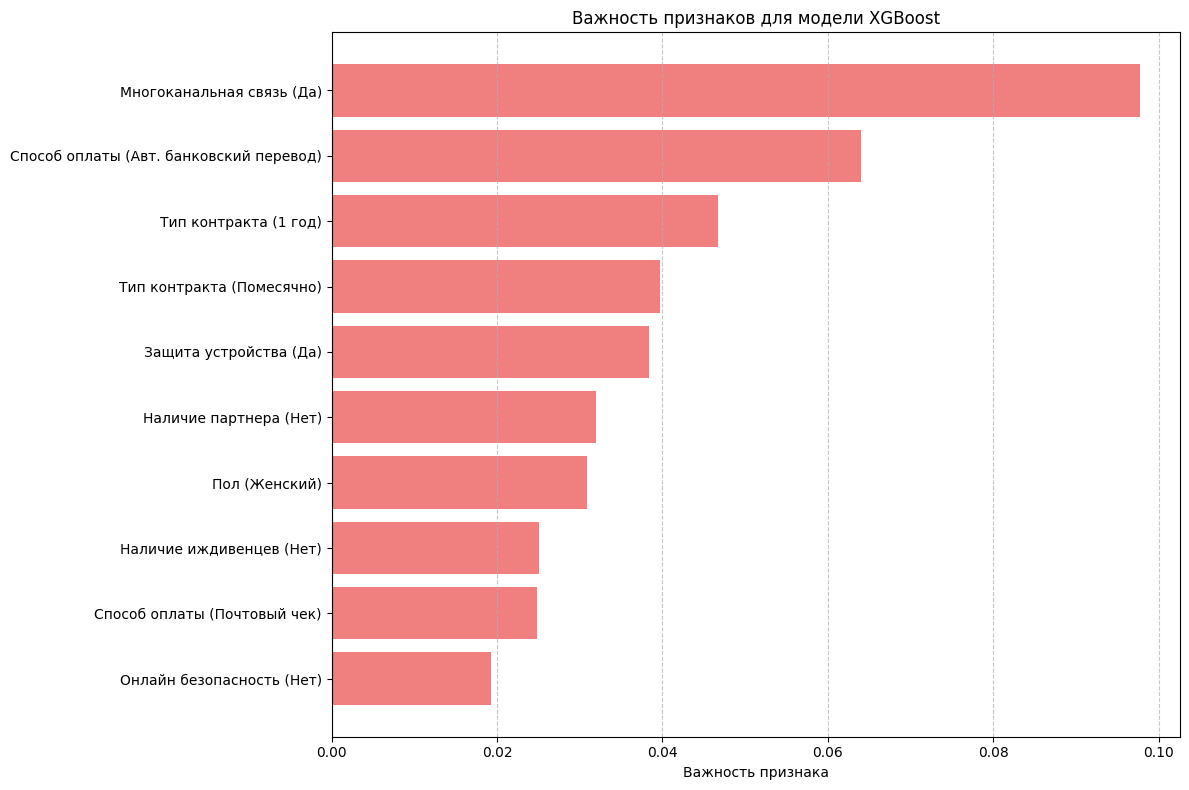

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt  # Библиотека для графического отображения данных

features_russian = [
    "Многоканальная связь (Да)",
    "Способ оплаты (Авт. банковский перевод)",
    "Тип контракта (1 год)",
    "Тип контракта (Помесячно)",
    "Защита устройства (Да)",
    "Наличие партнера (Нет)",
    "Пол (Женский)",
    "Наличие иждивенцев (Нет)",
    "Способ оплаты (Почтовый чек)",
    "Онлайн безопасность (Нет)"
]
importance_values = [
    0.097696,
    0.063979,
    0.046754,
    0.039739,
    0.038321,
    0.032018,
    0.030832,
    0.025032,
    0.024882,
    0.019318
]


plt.figure(figsize=(12, 8))
plt.barh(features_russian, importance_values, color='lightcoral')
plt.xlabel('Важность признака')
plt.title('Важность признаков для модели XGBoost')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## Рекомендации:

На основании проведённого анализа, следующие меры могут быть предложены для улучшения удержания клиентов:

1. **Контракты с ежемесячной оплатой:** Клиенты, выбравшие ежемесячный тип оплаты, более склонны к оттоку. Возможно, стоит пересмотреть условия ежемесячных контрактов или предлагать дополнительные преимущества для клиентов, выбирающих долгосрочные контракты.

2. **Электронные счета:** Клиенты, использующие электронные счета, также более склонны к оттоку. Возможно, стоит улучшить пользовательский интерфейс или предложить дополнительные услуги для таких клиентов.

3. **Техническая поддержка:** Наши данные показали, что отсутствие технической поддержки увеличивает вероятность оттока. Компания может рассмотреть возможность расширения службы поддержки или улучшения качества предоставляемой поддержки.

4. **Услуги интернета:** Клиенты, использующие оптоволоконный интернет, более склонны к оттоку. Это может указывать на проблемы с качеством этой услуги. Компания может провести дополнительное исследование в этой области.

5. **Социально-демографические факторы:** Клиенты без партнёра и без иждивенцев также более склонны к оттоку. Это может быть связано с более высокой мобильностью таких клиентов. Компания может разработать специальные предложения для такой аудитории.

6. **Время пользования услугами:** Наши данные показывают, что новые клиенты более склонны к оттоку. Возможно, стоит усилить усилия по удержанию в течение первых месяцев использования услуг.

7. **Стоимость услуг:** Важно обратить внимание на ежемесячные расходы клиентов. Наши данные показывают, что более высокие расходы связаны с большей вероятностью оттока.

Эти рекомендации могут быть использованы компанией для разработки эффективных стратегий по удержанию клиентов и улучшению их опыта пользования услугами.

## Дополнительные возможности для улучшения модели

Данные, которыми вы располагаете, уже содержат множество полезных признаков, однако можно рассмотреть следующие возможные дополнения, которые могут помочь в предсказании оттока клиентов:

1. **Длительность контракта:** Ваши данные уже содержат информацию о дате начала контракта. Однако, можно добавить признак, который представляет собой длительность контракта. Клиенты с более долгосрочными контрактами могут быть менее склонны к оттоку.

2. **Количество продуктов:** (сделано) Вы можете добавить признак, который представляет собой общее количество продуктов или услуг, которые клиент использует. Это может включать услуги телефонии, интернета, телевидения и т.д. Клиенты, использующие большее количество услуг, могут быть менее склонны к оттоку.

3. **История взаимодействия с клиентом:** Если у вас есть доступ к этим данным, можно добавить признаки, связанные с историей взаимодействия с клиентом. Это может включать количество обращений в службу поддержки, уровень удовлетворенности от предыдущих взаимодействий и т.д.

4. **Уровень использования услуг:** Если у вас есть данные об использовании услуг клиентами (например, количество сделанных звонков, объем потребляемого трафика), вы можете добавить эти признаки в свою модель. Клиенты, которые активно используют ваши услуги, могут быть менее склонны к оттоку.

5. **Демографическая информация:** Если у вас есть доступ к дополнительной демографической информации о ваших клиентах (например, возраст, образование, доход), это также может быть полезно для предсказания оттока.

Помните, что добавление новых признаков может потребовать дополнительной предобработки и может увеличить сложность вашей модели. Всегда важно проверять, улучшают ли новые признаки качество вашей модели.

